In [1]:
# Download twitter_archive_enhanced.csv file
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv

--2020-10-11 20:52:51--  https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.224.10.62, 13.224.10.52, 13.224.10.190, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.224.10.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 915692 (894K) [text/csv]
Saving to: ‘twitter-archive-enhanced.csv’

twitter-archive-enh 100%[===================>] 894.23K  --.-KB/s    in 0.04s   

2020-10-11 20:52:52 (21.2 MB/s) - ‘twitter-archive-enhanced.csv’ saved [915692/915692]



In [2]:
# Download image_predictions.tsv file
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

--2020-10-11 20:52:52--  https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.224.10.52, 13.224.10.62, 13.224.10.99, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.224.10.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335079 (327K) [text/tab-separated-values]
Saving to: ‘image-predictions.tsv’

image-predictions.t 100%[===================>] 327.23K  1.24MB/s    in 0.3s    

2020-10-11 20:52:53 (1.24 MB/s) - ‘image-predictions.tsv’ saved [335079/335079]



In [3]:
# Download JSON file
!wget https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt

--2020-10-11 20:52:53--  https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt
Resolving video.udacity-data.com (video.udacity-data.com)... 104.21.234.211, 104.21.234.210, 2606:4700:3038::6815:ead3, ...
Connecting to video.udacity-data.com (video.udacity-data.com)|104.21.234.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10609234 (10M) [text/plain]
Saving to: ‘tweet-json.txt’

tweet-json.txt      100%[===================>]  10.12M  10.5MB/s    in 1.0s    

2020-10-11 20:52:54 (10.5 MB/s) - ‘tweet-json.txt’ saved [10609234/10609234]



In [4]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load twitter_archive_enhanced.csv file as a dataframe
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")

# Load image_predictions.tsv file as a dataframe
predicitions_df = pd.read_csv("image-predictions.tsv", sep='\t')

In [6]:
"""
import tweepy
from timeit import default_timer as timer

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open("tweet_json.txt", "w") as outfile:
  for tweet_id in twitter_df["tweet_id"].values:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
      tweet = api.get_status(tweet_id, tweet_mode='extended')
      print("Success")
      json.dump(tweet._json, outfile)
      outfile.write('\n')
    except tweepy.TweepError as e:
      print("Fail")
      fails_dict[tweet_id] = e
      pass
end = timer()
print(end - start)
print(fails_dict)

"""

'\nimport tweepy\nfrom timeit import default_timer as timer\n\nconsumer_key = \'\'\nconsumer_secret = \'\'\naccess_token = \'\'\naccess_secret = \'\'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open("tweet_json.txt", "w") as outfile:\n  for tweet_id in twitter_df["tweet_id"].values:\n    count += 1\n    print(str(count) + ": " + str(tweet_id))\n    try:\n      tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n      print("Success")\n      json.dump(tweet._json, outfile)\n      outfile.write(\'\n\')\n    except tweepy.TweepError as e:\n      print("Fail")\n      fails_dict[tweet_id] = e\n      pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n\n'

In [7]:
# Load tweet-json.txt file as a dataframe
json_data = []
with open('tweet-json.txt') as json_file:
  for line in json_file:
    json_data.append(json.loads(line))

tweet_json_df = pd.DataFrame(json_data)

In [8]:
tweet_json_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [9]:
# Drop all columns except id, retweet_count, favorite_count
tweet_json_df = tweet_json_df[['id','retweet_count', 'favorite_count']]

# Twitter Dataframe

In [10]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
type(twitter_df['timestamp'][0])

str

In [13]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_df["rating_numerator"].sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [15]:
twitter_df["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_df["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
twitter_df["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
twitter_df["source"].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

## Quality Issues
- timestamp column is string not datetime.
- We only want original ratings, not retweets or replies.
- We do not need columns related to tweets and replies.
- source column is not useful.
- Dog stage is None instead of NaN
- Some entries have more than one stage.
- Some entries have invalid names. ('None', 'a', 'the', ...etc)

## Tidiness Issues
- There should be a column for the date and a column for the time.
- The dog stage should be a single column (Each variable forms a column).
- Rating should be a single column.

## Clean

### Convert timestamp column to datetime.

In [19]:
twitter_df["timestamp"] = pd.to_datetime(twitter_df["timestamp"])

In [20]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Split the timestamp column into a column for the date and a column for the time.

In [21]:
# Create date column
twitter_df["date"] = pd.to_datetime(twitter_df["timestamp"]).dt.date
# Create time column
twitter_df["time"] = pd.to_datetime(twitter_df["timestamp"]).dt.time
# Remove timestamp column
twitter_df.drop(['timestamp'], axis=1, inplace=True)

In [22]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Remove replies by keeping only rows where in_reply_to_status_id is Nan

In [23]:
len(twitter_df[twitter_df["in_reply_to_status_id"].notnull()])

78

In [24]:
twitter_df = twitter_df[twitter_df["in_reply_to_status_id"].isnull()]

In [25]:
len(twitter_df[twitter_df["in_reply_to_status_id"].notnull()])

0

### Remove retweets by keeping only rows where retweeted_status_id is Nan

In [26]:
len(twitter_df[twitter_df["retweeted_status_id"].notnull()])

181

In [27]:
twitter_df = twitter_df[twitter_df["retweeted_status_id"].isnull()]

In [28]:
len(twitter_df[twitter_df["retweeted_status_id"].notnull()])

0

### Remove columns related to tweets and replies.
### Remove source column

In [29]:
twitter_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                 'retweeted_status_id', 'retweeted_status_user_id',
                 'retweeted_status_timestamp', 'source'], axis=1,
                 inplace=True)

In [30]:
twitter_df.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time'],
      dtype='object')

###  Dog stage is None instead of NaN

In [31]:
twitter_df[["doggo", "floofer", "pupper", "puppo"]] = twitter_df[["doggo", "floofer", "pupper", "puppo"]].replace(to_replace="None", value=np.nan)

In [32]:
twitter_df.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,2017-08-01,16:23:56
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,2017-08-01,00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,2017-07-31,00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,2017-07-30,15:58:51
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,2017-07-29,16:00:24


### Drop enteries with more than one stage.

In [33]:
twitter_df[twitter_df[["doggo", "floofer", "pupper", "puppo"]].notnull().sum(axis=1) > 1]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
191,855851453814013952,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,NaN,NaN,puppo,2017-04-22,18:31:02
200,854010172552949760,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,NaN,NaN,2017-04-17,16:34:26
460,817777686764523521,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,NaN,pupper,NaN,2017-01-07,16:59:28
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,NaN,pupper,NaN,2016-12-12,00:29:28
575,801115127852503040,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN,2016-11-22,17:28:25
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN,2016-10-11,00:34:48
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,NaN,pupper,NaN,2016-09-29,01:42:20
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN,2016-07-31,16:50:42
956,751583847268179968,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,NaN,pupper,NaN,2016-07-09,01:08:47
1063,741067306818797568,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN,2016-06-10,00:39:48


In [34]:
# Keep only rows where only one of doggo, floofer, pupper or puppo is nan
twitter_df = twitter_df[twitter_df[["doggo", "floofer", "pupper", "puppo"]].notnull().sum(axis=1) <= 1]

In [35]:
(twitter_df[["doggo", "floofer", "pupper", "puppo"]].notnull().sum(axis=1) > 1).sum()

0

### Convert the dog stage to a single column

In [36]:
# Merge all stage columns into one
# stage will have only one values since only at most one of them is nan
twitter_df['stage'] = twitter_df[["doggo", "floofer", "pupper", "puppo"]].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)
# Some rows will have empty enteries so replace them with nan
twitter_df['stage'] = twitter_df['stage'].replace('', np.nan)
# Drop not needed columns
twitter_df.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

In [37]:
twitter_df["stage"].value_counts()

pupper     221
doggo       72
puppo       23
floofer      9
Name: stage, dtype: int64

In [38]:
twitter_df.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,NaN


### Merge rating columns into a single column.

In [39]:
twitter_df['rating'] = twitter_df[["rating_numerator", "rating_denominator"]].apply(lambda x: '/'.join(x.astype(str)), axis=1)

In [40]:
# Remove rating_numerator and rating_denominator columns
twitter_df.drop(columns=["rating_numerator", "rating_denominator"], inplace=True)

In [41]:
twitter_df.head()

,tweet_id,text,expanded_urls,name,date,time,stage,rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,16:23:56,NaN,13/10
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,00:17:27,NaN,13/10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,00:18:03,NaN,12/10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,15:58:51,NaN,13/10
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,16:00:24,NaN,12/10


### Turn invalid dog names to nan (None, a, the, ...etc)

In [42]:
twitter_df["name"] = twitter_df["name"].replace(to_replace=["None", "a", "the"], value=np.nan)

In [43]:
twitter_df.head()

,tweet_id,text,expanded_urls,name,date,time,stage,rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,16:23:56,NaN,13/10
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,00:17:27,NaN,13/10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,00:18:03,NaN,12/10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,15:58:51,NaN,13/10
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,16:00:24,NaN,12/10


## Predictions Dataframe

In [44]:
predicitions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
predicitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
predicitions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [47]:
predicitions_df["p1"].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

### Quality Issues
- Entries where the highest confidence is non-dog should be removed.
- Dog breed name should be titled a seperated using spaces.

## Tidiness Issues
- The dog breed should be a single column.

### Remove entries where the highest confidence is non-dog.
### Turn the dog breed into a single column

In [48]:
# Get the highest confidence of each row
max_conf = predicitions_df[["p1_conf", "p2_conf", "p3_conf"]].idxmax(axis=1)
# Check if the highest confidence of each row is a dog
is_dog = max_conf.str.split("_").apply(lambda x: x[0] + "_dog")
# Create a column with the type of the highest confidence
max_breed = max_conf.str.split("_").apply(lambda x: x[0])
predicitions_df["breed"] = predicitions_df.lookup(max_breed.index, max_breed.values)
# Keep only rows where the highest confidence is a dog
predicitions_df = predicitions_df[predicitions_df.lookup(is_dog.index, is_dog.values)]
# Remove not needed columns
predicitions_df.drop(['p1', 'p1_conf', 'p1_dog',
                      'p2', 'p2_conf', 'p2_dog',
                      'p3', 'p3_conf', 'p3_dog'], axis=1,
                       inplace=True)

In [49]:
predicitions_df.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Seperate Dog breed using space instead of underscores and make each word uppercase

In [50]:
# Turn to upper case
predicitions_df["breed"] = predicitions_df["breed"].str.title()
# Seperate at underscores
predicitions_df["breed"] = predicitions_df["breed"].str.split("_")
# Join with spaces
predicitions_df["breed"] = predicitions_df["breed"].str.join(" ")

In [51]:
predicitions_df["breed"].head()

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
Name: breed, dtype: object

In [52]:
predicitions_df.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher


## Tweets Dataframe

In [53]:
tweet_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [54]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [55]:
tweet_json_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Twitter Archive Master Dataframe

## Quality Issues
- tweet_id column is not useful
## Tidiness Issues
- There should be a single dataframe

### We should use the predictions dataframe to keep the tweets as we only want dog tweets

In [56]:
twitter_archive_master = pd.merge(left=twitter_df, right=predicitions_df,
                                  how='right', on="tweet_id")

In [57]:
twitter_archive_master = pd.merge(left=tweet_json_df, right=twitter_archive_master,
                                  how='right', left_on="id", right_on="tweet_id")

In [58]:
# Remove tweet_id column as we do not need it anymore
twitter_archive_master.drop(['tweet_id', 'id'], axis=1, inplace=True)

In [59]:
twitter_archive_master[["retweet_count", "favorite_count"]] = twitter_archive_master[["retweet_count", "favorite_count"]].astype('Int64')

In [60]:
twitter_archive_master.head()

,retweet_count,favorite_count,text,expanded_urls,name,date,time,stage,rating,jpg_url,img_num,breed
0,532,2535,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,NaN,2015-11-15,22:32:08,NaN,8/10,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel
1,48,132,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,2015-11-15,23:05:30,NaN,7/10,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone
2,47,128,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,2015-11-15,23:21:54,NaN,9/10,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd
3,147,311,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,NaN,2015-11-16,00:04:52,NaN,6/10,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback
4,41,111,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,2015-11-16,00:24:50,NaN,5/10,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher


In [61]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

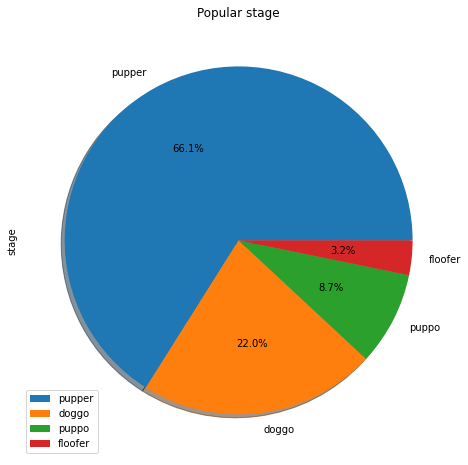

In [62]:
twitter_archive_master["stage"].value_counts().plot.pie(figsize=(8, 8), shadow=True, legend=True, autopct='%1.1f%%', title="Popular stage")

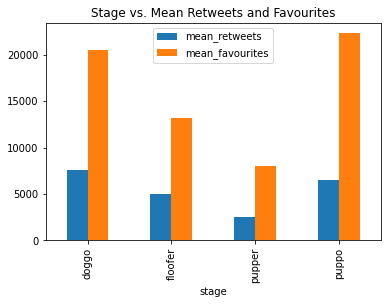

In [63]:
df = pd.DataFrame({'mean_retweets':twitter_archive_master.groupby('stage')['retweet_count'].agg('mean'),
                   'mean_favourites':twitter_archive_master.groupby('stage')['favorite_count'].agg('mean')})
df.plot.bar(title="Stage vs. Mean Retweets and Favourites")

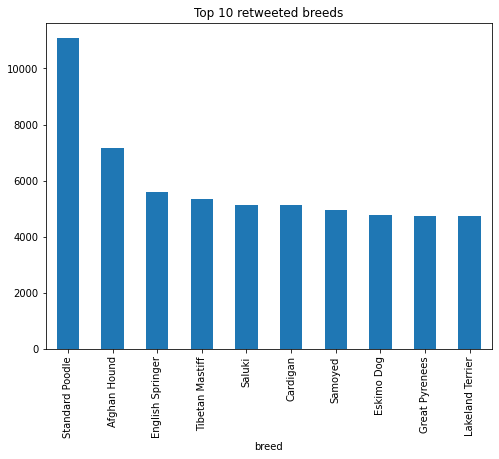

In [64]:
top_10_breeds_retweets = twitter_archive_master.groupby('breed')['retweet_count'].agg('mean').sort_values(ascending=False)[:10]
top_10_breeds_retweets.plot.bar(figsize=(8, 6), title="Top 10 retweeted breeds")

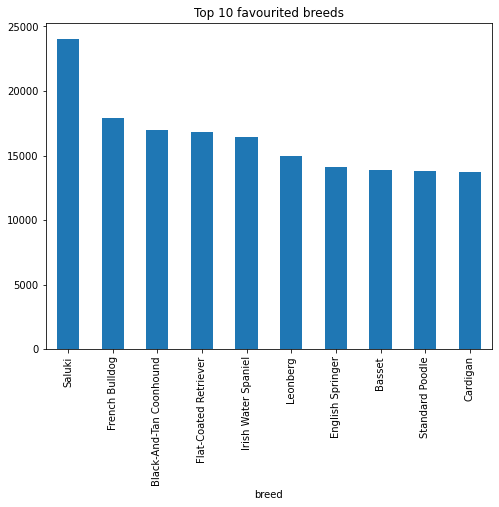

In [65]:
top_10_breeds_favourites = twitter_archive_master.groupby('breed')['favorite_count'].agg('mean').sort_values(ascending=False)[:10]
top_10_breeds_favourites.plot.bar(figsize=(8, 6), title="Top 10 favourited breeds")

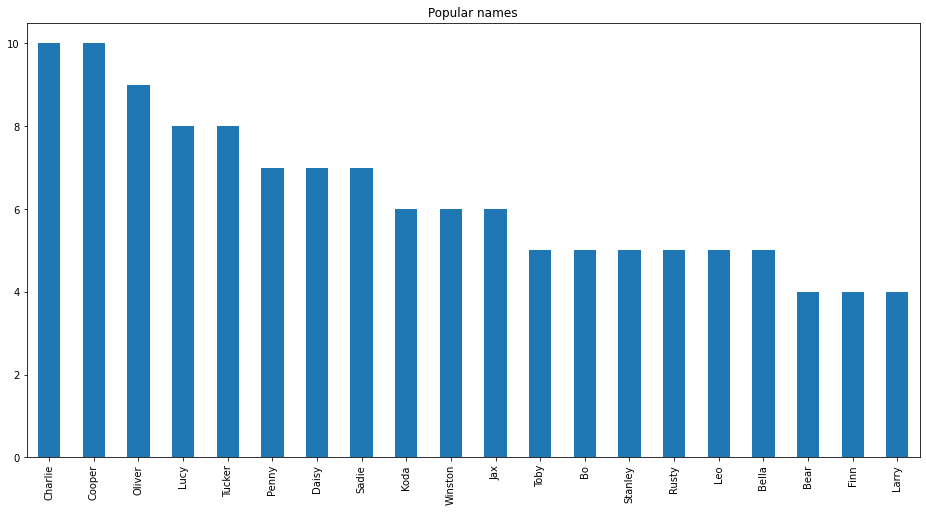

In [66]:
top_20_names = twitter_archive_master['name'].value_counts().sort_values(ascending=False)[:20]
top_20_names.plot.bar(figsize=(16, 8), title="Popular names")